<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/image_processing/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digitális képfeldolgozás

A képfeldolgozás (image processing), az alakfelismerés (pattern recognition) és a számítógépes grafika (computer graphics) is a digitális képekkel kapcsolatos informatikai területek. A képfeldolgozás során egy képből egy másik képet álltunk elő. Az alakfelismerés során a képből egy általában vektoros leírást állítunk elő. A számítógépes grafika az áltlában vektoros leírásból a képet állítja elő, ezen a területen nagyon gyakran mesterséges intelligencia (gépi tanulás, mély tanulás, stb.) algoritmusokat használnak. Mivel manapság a megjelenítő eszközeink szinte kívétel nélkül raszteres a kép az RGB kódok mátrixban elrendezett értékeit jelenti.

```

                        +-------+  Alakfelismerés  +----------+
                 +----> |       | -------------->  |          |
  Képfeldolgozás |      |  Kép  |                  |  Leírás  |
                 +----- |       | <--------------  |          |
                        +-------+  Számítógépes    +----------+
                                      grafika 
```

In [4]:
# szükséges könyvtárak betöltése
import matplotlib.pyplot as plt   # matplotlib a grafikus megjelenítéshez
import numpy as np                # numpy a mátrix műveletekhez
import cv2                        # opencv könyvtár képfeldolgozáshoz

Leírás: egyenes (0,0) - (10,10) között


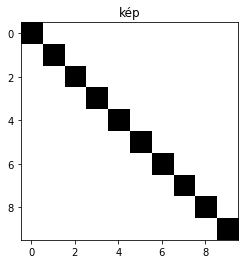

In [5]:
img = 255 - np.eye(10) * 255
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title('kép')
print('Leírás: egyenes (0,0) - (10,10) között')

**Figyelem** a kép origója a bal felső sarok!

A képfeldolgozás során egyik képből egy másik képet készítünk, ennek általában a célja, hogy a képből újabb vagy kévésbé kivehető információhoz jussunk. Tulajdonképpen a jelfeldolgozás egy speciális 2D-s változatával van dolgunk.



A digitális képeket a számítógépeken 2D-s vagy 3D-s tömbökben (mátrixokban tároljuk). A képek pixel sorokból és oszlopokból állnak. Az egyes pixelekben az adott pozicióban megjelenítendő szín kódolt értékét tároljuk. A színes képek esetén leggyakrabban RGB kódokat kezelünk, három 0-255 közötti értékekkel. A képfeldolgozás esetén gyakran áttérünk a szürkeárnyalatos vagy fekete-fehér képekre. Ezekben az esetekben képpontonként egy byte vagy egy bit is elegendő a szín információ tárolására.

In [6]:
# letöltünk egy képet a GitHub-ról
!wget -O sample_data/adalbert.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/20211022_133458.jpg
# betöltjük a használt Python csomagokat

--2022-02-25 12:54:20--  https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/20211022_133458.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1664108 (1.6M) [image/jpeg]
Saving to: ‘sample_data/adalbert.jpg’

sample_data/adalber 100%[===================>]   1.59M  --.-KB/s    in 0.06s   

2022-02-25 12:54:20 (27.9 MB/s) - ‘sample_data/adalbert.jpg’ saved [1664108/1664108]



Több Python nyelvből használható ingyenes képfeldolgozási feladatokra alkalmas csomag/programkönyvtár is létezik. Ezek közül elsősorban az OpenCV-t használjuk majd, emellett a képek megjelentéséhez a Matplotlib szolgáltatásait vesszük igénybe.

Az érdeklődők számára, a teljesség igénye nélkül néhány további Pythonból elérhető képfeldolgozásra használható könyvtár:


*   [PIL/pillow](https://pillow.readthedocs.io/en/stable/) (Python Image Library)
*   [sckikit-image](https://scikit-image.org/)
*   [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html)
*   [ImageMagick](https://wiki.python.org/moin/ImageMagick)



##Szürkeárnyalatos és fekete-fehér képek előállítása színes képekből

A képfeldologzás során sokszor lecsökkentjük a képek színmélységét a feldolgozás egyszerűbbé és hatékonyabbá tétele érdekében.

színes képméret: (1536, 2048, 3), szürkeárnyalatos képméret: (1536, 2048)
Részlet a szürkeárnyalatos kép adataiból 10 x 15 pixel
[[198 194 198 192 196 202 197 196 187 192 193 185 183 191 195]
 [196 202 196 197 175 202 198 203 190 195 194 186 187 191 187]
 [208 203 199 199 184 193 198 192 188 200 195 198 190 192 191]
 [174 212 200 201 195 197 198 206 201 197 198 187 167 190 200]
 [181 205 200 192 182 199 193 192 195 197 199 199 201 198 185]
 [191 199 201 211 206 198 196 183 184 195 202 204 199 166 141]
 [178 204 202 204 194 194 195 200 198 205 191 164 119 139 159]
 [198 195 196 184 178 204 194 204 202 159 121 107 113 139 163]
 [190 189 188 192 196 207 200 157 121 121 133 138 156 173 176]
 [183 195 195 199 202 166 124 119 124 141 152 172 168 120  89]]


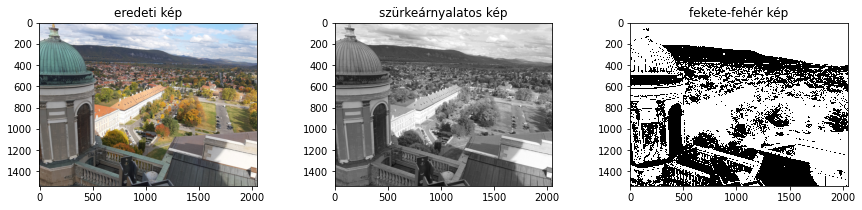

In [7]:
# kép betöltése
sample_bgr = cv2.imread('sample_data/adalbert.jpg')
# szürkeárnyalatos képpé konvertálás, az R, G, B értékeke átlaga
sample_gray = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2GRAY)
# fekete-fehér kép a szürkeárnyalatosból, 0-th -> 0, th-255 -> 255
th = 100
thres, sample_bw = cv2.threshold(sample_gray, th, 255, cv2.THRESH_BINARY)
# képek megjelenítése
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('eredeti kép')
ax2.imshow(sample_gray, cmap='gray')
ax2.set_title('szürkeárnyalatos kép')
ax3.imshow(sample_bw, cmap='gray', interpolation='nearest')
ax3.set_title('fekete-fehér kép')
print(f'színes képméret: {sample_bgr.shape}, szürkeárnyalatos képméret: {sample_gray.shape}')
print('Részlet a szürkeárnyalatos kép adataiból 10 x 15 pixel')
print(sample_gray[800:810,830:845])

Módosítsa a küszöbértéket a fekete-fehér képpé konvertáláshoz (th változó a fenti kódban) és futtassa újra a blokkot!

###Adaptív küszöbérték

A fekete-fehér képpé konvertálás egy, az egész képre érvényes küszöbérték esetén sokszor nem megfelelő, főleg, ha árnyékos és napos részek is vannak a képen. Ebben az esetben az adaptív módszer célravezetőbb, a kép kisebb részeire eltérő küszöbértékeket használunk

390508275 389532900


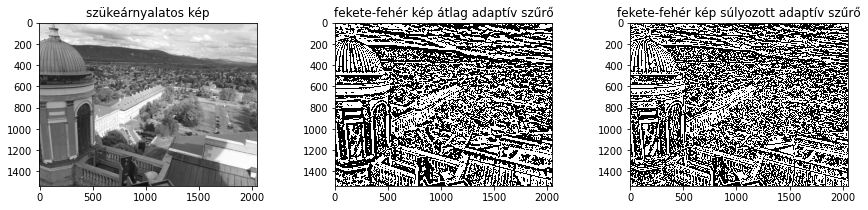

In [ ]:
win = 51  # részterület mérete, melyre külön küszöbértéket állapítunk meg
const = 0 # az átlagból levont érték
# a részterületre eső pixelek átlaga a küszöbérték
bw1 = cv2.adaptiveThreshold(sample_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, win, const)
# a részterületre eső pixelek súlyozott átlaga a küszöbérték
bw2 = cv2.adaptiveThreshold(sample_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, win, const)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
ax1.imshow(sample_gray, cmap='gray')
ax1.set_title('szükeárnyalatos kép')
ax2.imshow(bw1, cmap='gray', interpolation='nearest')
ax2.set_title('fekete-fehér kép átlag adaptív szűrő')
ax3.imshow(bw2, cmap='gray', interpolation='nearest')
ax3.set_title('fekete-fehér kép súlyozott adaptív szűrő')
print(np.sum(bw1), np.sum(bw2))

Módosítsa a fenti kódban az adaptív szűrő paramétereit (*win* és *const* változók). A *win* változó a feldolgozandó részlet szélességét adja meg pixelekben, a *const* érték pedig a színkódból levonandó számérték.

#Kontraszt és fényesség

A kontraszt növelés a pixelek egy konstanssal szorzásával történhet meg. A fényesség módosítása egy konstans hozzáadásával.


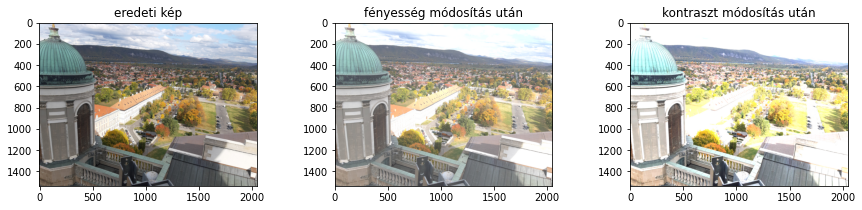

In [ ]:
alfa = 2.0   # szorzótényező kontraszt növeléséhez
beta = 50    # eltolás a fényesség módosításához
if beta > 0:
  new_img1 = np.where(sample_bgr > 255 - beta, 255, sample_bgr + beta)
else:
  new_img1 = np.where(sample_bgr > abs(beta), sample_bgr + beta, 0)
if alfa > 1:
  new_img2 = np.where(sample_bgr > 255 // alfa, 255, sample_bgr * alfa).astype('uint8')
else:
  new_img2 = np.clip(sample_bgr * alfa, 0, 255).astype('uint8')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('eredeti kép')
ax2.imshow(cv2.cvtColor(new_img1, cv2.COLOR_BGR2RGB))
ax2.set_title('fényesség módosítás után')
ax3.imshow(cv2.cvtColor(new_img2, cv2.COLOR_BGR2RGB))
w = ax3.set_title('kontraszt módosítás után')


##Konvolúciós szűrők

A konvolúciós szűrők zajszűrésre (alúl áteresztő szűrők) és élkiemelésre (felül áteresztő szűrők) is használhatók. A szűrés során páratlan számú sorokból álló, súlyokat tartalmazó négyzetes mátrixot alkalmazunk minden pixelre a képben.A szűrt kép egyes képpontjainak a színét úgy kapjuk meg, hogy szűrő mátrix középső elemét a kép mátrix egy elemére illesztjük, a fedésbe került elemeket összeszorozzuk és a szorzatokat összegezzük. Például egy háromszor hármas minden elemében 1/9 értéket tartalmazó mátrix a pixel és a körülötte lévő nyolc pixel átlagát számítja, azaz simítani fog.

simító szűrő
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
élkiemelő szűrő
[[-1 -1 -1]
 [-1 15 -1]
 [-1 -1 -1]]


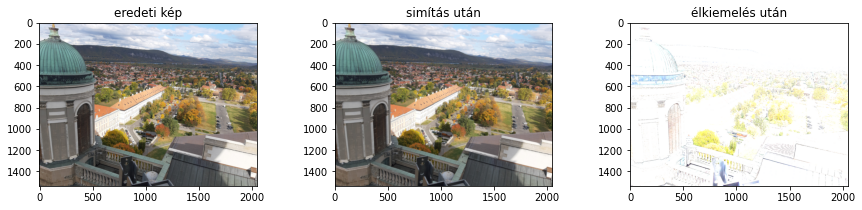

In [16]:
# Zajszűrő (simító) szűrő
ksize1 = 5       # szűrő mérete
kernel1 = np.full((ksize1, ksize1), 1) / ksize1**2  # a szűrő elemeinek összege 1
blured = cv2.filter2D(sample_bgr, -1, kernel1)
# Élkiemelő szűrő
kmax = 15
ksize2 = 3
kernel2 = np.full((ksize2, ksize2), -1)
kernel2[ksize2 // 2, ksize2 // 2] = kmax
edges = cv2.filter2D(sample_bgr, -1, kernel2)
print('simító szűrő')
print(kernel1)
print('élkiemelő szűrő')
print(kernel2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('eredeti kép')
ax2.imshow(cv2.cvtColor(blured, cv2.COLOR_BGR2RGB))
ax2.set_title('simítás után')
ax3.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
w = ax3.set_title('élkiemelés után')

Módosítsa a szűrők paramétereit (ksize1, ksize2, kmax változók) és futtassa újra a kódblokkot!

Az OpenCV és más képfeldolgozó programok jóval több és a fentieknél összetettebb szűrőt is tartalmaznak. Néhány további kipróbálásra javasolt OpenCV szűrő:

*   GaussianBlur
*   MedianBlur
*   Sobel


##Hisztogram kiegyenlítés

A különböző színárnyalatok gyakoriságát ábrázoló grafikon a hisztogram. Ha a hisztogram azt mutatja, hogy a színek egy része alulreprezentált a hisztogramban, akkor a kép minőségét, részletességét a hisztogram kiegyenlítéssel javíthatjuk.

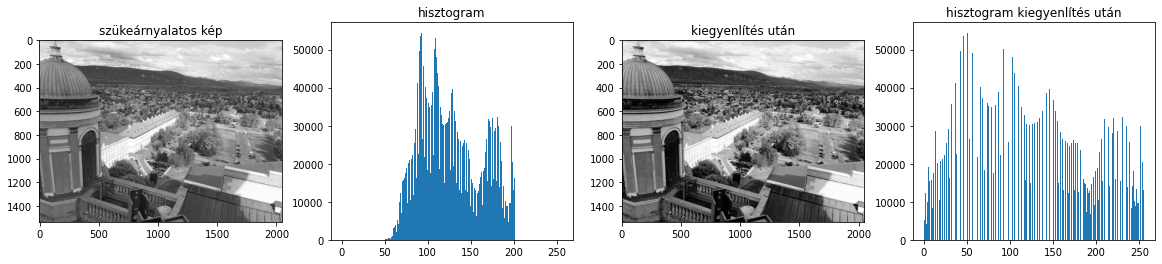

In [22]:
test = (sample_gray / 255 * 150 + 50).astype('uint8') # színek leszűkítése 150-re
equ = cv2.equalizeHist(test)                          # hisztogram széthúzása
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(20, 4)
ax1.imshow(test, cmap='gray')
ax1.set_title('szükeárnyalatos kép')
ax2.hist(test.ravel(), 256, [0, 256])
ax2.set_title('hisztogram')
ax3.imshow(equ, cmap='gray')
ax3.set_title('kiegyenlítés után')
ax4.hist(equ.ravel(), 256, [0, 256])
w = ax4.set_title('hisztogram kiegyenlítés után')

Felhasznált források:


1.  https://www.tutorialspoint.com/dip/image_processing_introduction.htm
2.  https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html 